# Regularization parameter: Lasso

The  λλ  for lasso can var between 0 (no penalty, acts like OLS) and infinity. If  λλ  is too large, all parameters will be set to zero.

Create a plot below of how  R2R2  varies across different values of  λλ  for ridge and lasso regression. Use logic and code similar to the ridge regression demonstration above, and base your plot on the X_train2 feature set.

Do lasso and ridge yield the same  R2R2  for a given lambda value?

Submit your work and discuss the results with your mentor.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [12]:
# Load the data again. Keep air quality data, drop the index column
# and any missing data columns.
df = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:,1:].dropna()

# Recode strings to numeric.
df['default'] = np.where(df['default']=='Yes', 1, 0)
df['student'] = np.where(df['student']=='Yes', 1, 0)
names = df.columns
df = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize = int(df.shape[0] / 2)
df_test = df.iloc[trainsize:, :].copy()
df_train = df.iloc[:trainsize, :].copy()

Y_train = df_train['income'].values.reshape(-1, 1)
X_train = df_train.loc[:, ~(df_train.columns).isin(['income'])]

# Make some new features to capture potential quadratic and cubic
# relationships between solar radiation and day or temperature.
df_train['balance_student'] = df_train['balance'] * df_train['student']
df_train['balance_default'] = df_train['balance'] * df_train['default']
df_train['student_default'] = df_train['student'] * df_train['default']
df_train['balance_sqrt'] = (df_train['balance'] + 100) ** .5
df_train['balance2'] = (df_train['balance'] + 100) ** 2
df_train['balance3'] = (df_train['balance'] + 100) ** 3

X_train2 = df_train.loc[:, ~(df_train.columns).isin(['income'])]
X_train2

,default,student,balance,balance_student,balance_default,student_default,balance_sqrt,balance2,balance3
0,-0.185599,-0.645936,-0.218835,0.141353,0.040616,0.119885,9.989052,9956.280924,9.934493e+05
1,-0.185599,1.548141,-0.037616,-0.058235,0.006981,-0.287334,9.998119,9992.478229,9.988719e+05
2,-0.185599,-0.645936,0.492410,-0.318066,-0.091391,0.119885,10.024590,10098.724506,1.014845e+06
3,-0.185599,-0.645936,-0.632893,0.408808,0.117464,0.119885,9.968305,9873.822052,9.811331e+05
4,-0.185599,-0.645936,-0.102791,0.066396,0.019078,0.119885,9.994859,9979.452390,9.969194e+05
5,-0.185599,1.548141,0.174106,0.269541,-0.032314,-0.287334,10.008702,10034.851585,1.005232e+06
6,-0.185599,-0.645936,-0.020388,0.013169,0.003784,0.119885,9.998981,9995.922788,9.993885e+05
7,-0.185599,1.548141,-0.055216,-0.085482,0.010248,-0.287334,9.997239,9988.959886,9.983444e+05
8,-0.185599,-0.645936,0.673329,-0.434927,-0.124969,0.119885,10.033610,10135.119141,1.020336e+06
9,-0.185599,-0.645936,-1.727085,1.115586,0.320546,0.119885,9.913270,9657.565919,9.490772e+05


In [13]:
# Large number of parameters.
lassBig = linear_model.Lasso(alpha=.35)
lassBig.fit(X_train2, Y_train)
print('\nR² for the model with many features:')
print(lassBig.score(X_train2, Y_train))
origparams = np.append(lassBig.coef_, lassBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(origparams)


R² for the model with many features:
0.44363376712897057

Parameter estimates for the model with many features:
[ 0.00000000e+00 -3.89351238e-01  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00 -2.77688887e-04
 -7.09158792e-07  3.48711577e+00]


# try with Ridge just using the notation we used for lasso

In [14]:
# Large number of parameters.
ridgeBig = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeBig.fit(X_train2, Y_train)
print('\nR² for the Ridge model with many features:')
print(ridgeBig.score(X_train2, Y_train))
ridgeBig_origparams = np.append(ridgeBig.coef_, ridgeBig.intercept_)
print('\nParameter estimates for the model with many features:')
print(ridgeBig_origparams)


R² for the Ridge model with many features:
0.5739464289613285

Parameter estimates for the model with many features:
[-2.18345205e-03 -7.57156891e-01  4.77049991e-02 -3.66908529e-03
  9.52109450e-03 -3.78154074e-03 -4.47224220e-03  4.83414402e-04
 -4.79227769e-06  0.00000000e+00]


In [15]:
# Load air quality data, drop the index column and any missing data columns.
df2 = pd.read_csv(
    'https://vincentarelbundock.github.io/Rdatasets/csv/ISLR/Default.csv'
).iloc[:, 1:].dropna()

# Recode strings to numeric.
df2['default'] = np.where(df2['default'] == 'Yes', 1, 0)
df2['student'] = np.where(df2['student'] == 'Yes', 1, 0)
names = df2.columns
df2 = pd.DataFrame(preprocessing.scale(df), columns=names)

# Define the training and test sizes.
trainsize2 = int(df2.shape[0] / 2)
df_test2 = df2.iloc[trainsize:, :].copy()
df_train2 = df2.iloc[:trainsize, :].copy()


# Set up the regression model to predict defaults using all other
# variables as features.
regr1 = linear_model.LinearRegression()
Y_train_2 = df_train2['income'].values.reshape(-1, 1)
X_train_2 = df_train2.loc[:, ~(df_train2.columns).isin(['income'])]
regr1.fit(X_train_2, Y_train_2)
print('\nR-squared simple model:')
print(regr1.score(X_train_2, Y_train_2))

#Store the parameter estimates.
origparams = np.append(regr1.coef_, regr1.intercept_)

# Make new features to capture potential quadratic and cubic relationships
# between the features.
df_train2['balance_student'] = df_train2['balance'] * df_train2['student']
df_train2['balance_default'] = df_train2['balance'] * df_train2['default']
df_train2['student_default'] = df_train2['student'] * df_train2['default']
df_train2['balance_sqrt'] = (df_train2['balance'] + 100) ** .5
df_train2['balance2'] = (df_train2['balance'] + 100) ** 2
df_train2['balance3'] = (df_train2['balance'] + 100) ** 3

# Re-run the model with the new features.
regrBig = linear_model.LinearRegression()
X_train2_2 = df_train2.loc[:, ~(df_train2.columns).isin(['income'])]
regrBig.fit(X_train2, Y_train_2)
print('\nR-squared complex model:')
print(regrBig.score(X_train2_2, Y_train_2))

# Store the new parameter estimates for the same features.
newparams = np.append(
    regrBig.coef_[0,0:(len(origparams)-1)],
    regrBig.intercept_)

print('\nParameter Estimates for the same predictors for the small model '
      'and large model:')
compare = np.column_stack((origparams, newparams))
prettycompare = np.array2string(
    compare,
    formatter={'float_kind':'{0:.3f}'.format})
print(prettycompare)


R-squared simple model:
0.573878496271703

R-squared complex model:
0.5739734452083989

Parameter Estimates for the same predictors for the small model and large model:
[[0.014 -0.004]
 [-0.759 -0.759]
 [0.000 4157.867]
 [-0.001 553434.606]]


In [5]:
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
ridgeregr.fit(X_train_2, Y_train_2)
print(ridgeregr.score(X_train_2, Y_train_2))
origparams = ridgeregr.coef_[0]
print(origparams)

ridgeregrBig = linear_model.Ridge(alpha=10, fit_intercept=False)
ridgeregrBig.fit(X_train2_2, Y_train_2)
print(ridgeregrBig.score(X_train2_2, Y_train_2))
newparams = ridgeregrBig.coef_[0, 0:len(origparams)]

print('\nParameter Estimates for the same predictors for the small model'
      'and large model:')
compare = np.column_stack((origparams, newparams))
prettycompare = np.array2string(
    compare,
    formatter={'float_kind':'{0:.3f}'.format})
print(prettycompare)

0.5738739164402877
[ 1.36988466e-02 -7.57859433e-01 -3.25298557e-04]
0.5739464289613281

Parameter Estimates for the same predictors for the small modeland large model:
[[0.014 -0.002]
 [-0.758 -0.757]
 [-0.000 0.048]]


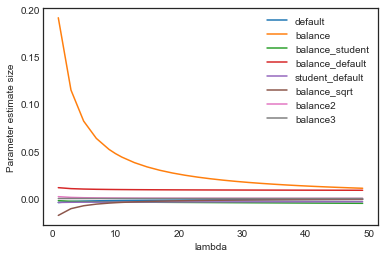

In [6]:
# Store estimates.
estimates = np.append(ridgeregrBig.coef_, [10])

# Storing legend information.
labels = []

#Run the model for many alphas.
for lambd in range(1, 50, 2):
    ridgeregrBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregrBig.fit(X_train2_2, Y_train_2)
    estimates = np.row_stack((
        estimates,
        np.append(ridgeregrBig.coef_,[lambd])))

# Make the data pretty.
estimates_df = pd.DataFrame(
    estimates,
    columns=list(X_train2_2.columns) + ['lambda'])
estimates_df.sort_values(by='lambda', inplace=True, ascending=True)

# Leave out the 'student' variable.
# It has very high values and throws off our plot's scale.
varstoplot = list(estimates_df.columns[:9,])
varstoplot.remove('student')

# Plot a line for each parameter.
for var in varstoplot:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size')
plt.legend(labels)
plt.show()

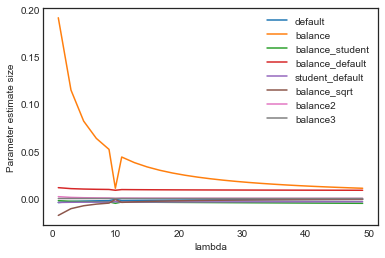

In [7]:
# Store estimates.
estimates = np.append(ridgeregrBig.coef_, [10])

# Storing legend information.
labels = []

#Run the model for many alphas.
for lambd in range(1, 50, 2):
    ridgeregrBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregrBig.fit(X_train2, Y_train)
    estimates = np.row_stack((
        estimates,
        np.append(ridgeregrBig.coef_,[lambd])))

# Make the data pretty.
estimates_df = pd.DataFrame(
    estimates,
    columns=list(X_train2.columns) + ['lambda'])
estimates_df.sort_values(by='lambda', inplace=True, ascending=True)

# Leave out the 'student' variable.
# It has very high values and throws off our plot's scale.
varstoplot = list(estimates_df.columns[:9,])
varstoplot.remove('student')

# Plot a line for each parameter.
for var in varstoplot:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('Parameter estimate size')
plt.legend(labels)
plt.show()